In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Union

In [14]:
def generate_sample_donations(filename: str = 'donations.txt', num_entries: int = 50) -> None:
    """
    Generate realistic donation data with controlled randomness
    
    Args:
        filename (str): Output file for donation data
        num_entries (int): Number of donation entries to generate
    """
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Generate donation amounts using normal distribution
    # Mean: $250, Standard Deviation: $100
    # Constrain values between $50 and $1000
    donations = np.clip(
        np.random.normal(250, 100, num_entries), 
        50, 
        1000
    )
    
    # Round to nearest dollar
    donations = np.round(donations, 2)
    
    # Write to file
    try:
        with open(filename, 'w') as f:
            for donation in donations:
                f.write(f"{donation}\n")
        print(f"Generated {num_entries} donations in {filename}")
    except IOError as e:
        print(f"Error writing file: {e}")

In [15]:
def read_donations(filename: str) -> pd.Series:
    """
    Robust donation data reading with error handling
    
    Args:
        filename (str): Path to donations file
    
    Returns:
        pd.Series: Cleaned and validated donation amounts
    """
    try:
        # Read donations, convert to numeric, handle errors
        donations = pd.read_csv(
            filename, 
            header=None, 
            names=['amount'], 
            dtype=float,
            error_bad_lines=False  # Skip problematic lines
        )['amount']
        
        # Remove extreme outliers (beyond 3 standard deviations)
        donations = donations[
            np.abs(donations - donations.mean()) <= 
            (3 * donations.std())
        ]
        
        return donations
    
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return pd.Series()
    except Exception as e:
        print(f"Error reading donations: {e}")
        return pd.Series()

In [16]:
def calculate_statistics(donations: pd.Series) -> dict:
    """
    Comprehensive statistical analysis of donations
    
    Args:
        donations (pd.Series): Donation amounts
    
    Returns:
        dict: Detailed statistical insights
    """
    # Ensure we have donations to analyze
    if donations.empty:
        return {}
    
    return {
        'Mean': donations.mean(),
        'Median': donations.median(),
        'Mode': donations.mode().values[0],
        'Standard Deviation': donations.std(),
        'Coefficient of Variation': donations.std() / donations.mean() * 100,
        'Minimum': donations.min(),
        'Maximum': donations.max(),
        'Total Donations': donations.sum(),
        'Donation Count': len(donations),
        'Quartile 1 (25%)': donations.quantile(0.25),
        'Quartile 3 (75%)': donations.quantile(0.75)
    }

In [17]:
def create_donation_visualizations(donations: pd.Series) -> None:
    """
    Create multi-modal visualization of donation data
    
    Args:
        donations (pd.Series): Donation amounts
    """
    plt.figure(figsize=(16, 12))
    
    # Subplot grid
    grid_spec = plt.GridSpec(2, 3, height_ratios=[1, 1])
    
    # Histogram with KDE
    plt.subplot(grid_spec[0, 0])
    donations.plot(kind='hist', bins=20, density=True, alpha=0.7)
    donations.plot(kind='kde', color='red')
    plt.title('Donation Distribution')
    plt.xlabel('Donation Amount ($)')
    plt.ylabel('Density')
    
    # Box Plot
    plt.subplot(grid_spec[0, 1])
    donations.plot(kind='box')
    plt.title('Donation Box Plot')
    
    # Violin Plot
    plt.subplot(grid_spec[0, 2])
    donations.plot(kind='violin')
    plt.title('Donation Violin Plot')
    
    # Cumulative Distribution
    plt.subplot(grid_spec[1, :])
    donations.sort_values().cumsum().plot()
    plt.title('Cumulative Donation Amount')
    plt.xlabel('Number of Donations')
    plt.ylabel('Total Donation Amount ($)')
    
    plt.tight_layout()
    plt.show()

Generated 50 donations in donations.txt
Error reading donations: read_csv() got an unexpected keyword argument 'error_bad_lines'
🔍 Donation Analytics Report 🔍
Analysis failed: no numeric data to plot


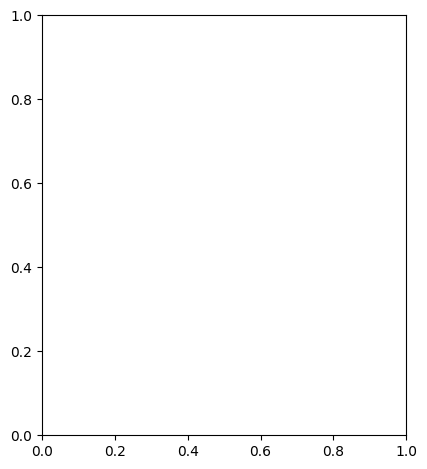

In [18]:
def main():
    try:
        # Data generation
        generate_sample_donations()
        
        # Data reading
        donations = read_donations('donations.txt')
        
        # Statistical analysis
        stats = calculate_statistics(donations)
        
        # Print statistics
        print("🔍 Donation Analytics Report 🔍")
        for stat, value in stats.items():
            print(f"{stat}: ${value:,.2f}")
        
        # Visualize data
        create_donation_visualizations(donations)
    
    except Exception as e:
        print(f"Analysis failed: {e}")

# Execution
if __name__ == '__main__':
    main()